In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np



In [18]:
train=pd.read_csv('train.csv')
test=pd.read_csv("test.csv")
pd.set_option('display.max_columns',len(train.columns))

In [19]:
train.head(10)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


In [20]:
train=train.drop_duplicates()
def split(Data,Target,id):
  y=Data[Target].copy()
  x=Data.drop([Target,id],axis=1).copy()
  return x,y
x,y=split(train,'Premium Amount','id')

In [21]:
x.head(10)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House
5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House
6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House
7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo
8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo
9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo


In [22]:
# @title info

def describe(df):
  desc=pd.DataFrame()
  desc['dtype']=df.dtypes
  desc['null']=df.isnull().sum()
  desc['%null'] = desc['null'] / len(df) * 100
  # desc['mean']=df.mean()
  # desc['median']=df.median()
  #desc['%unique'] = desc['nunique'] /len(df)*100
  desc = pd.concat([desc,df.describe(include = 'all').T],axis=1).sort_values(by='null',ascending=False)
  desc['count']=df.count()
  desc['unique']=df.nunique()
  # desc['freq/mean']=desc['freq'].fillna(desc['mean']).drop(['freq','mean'],axis=1)
  display(desc)
describe(train)

,dtype,null,%null,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Previous Claims,float64,364029,30.335750,835971,10,NaN,NaN,1.002689,0.98284,0.0,0.0,1.0,2.0,9.0
Occupation,object,358075,29.839583,841925,3,Employed,282750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit Score,float64,137882,11.490167,1062118,550,NaN,NaN,592.92435,149.981945,300.0,468.0,595.0,721.0,849.0
Number of Dependents,float64,109672,9.139333,1090328,5,NaN,NaN,2.009934,1.417338,0.0,1.0,2.0,3.0,4.0
Customer Feedback,object,77824,6.485333,1122176,3,Average,377905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Health Score,float64,74076,6.173000,1125924,532655,NaN,NaN,25.613908,12.203462,2.012237,15.918959,24.578648,34.527209,58.975914
Annual Income,float64,44949,3.745750,1155051,88593,NaN,NaN,32745.217777,32179.506124,1.0,8001.0,23911.0,44634.0,149997.0
Age,float64,18705,1.558750,1181295,47,NaN,NaN,41.145563,13.53995,18.0,30.0,41.0,53.0,64.0
Marital Status,object,18529,1.544083,1181471,3,Single,395391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle Age,float64,6,0.000500,1199994,20,NaN,NaN,9.569889,5.776189,0.0,5.0,10.0,15.0,19.0


In [40]:
null_counts= train.isnull().sum()

# Filter columns where null values are below the threshold
selected_columns=[ i for i in null_counts.index if i != "Policy Start Date" ]



In [41]:

selected_columns

['id',
 'Age',
 'Gender',
 'Annual Income',
 'Marital Status',
 'Number of Dependents',
 'Education Level',
 'Occupation',
 'Health Score',
 'Location',
 'Policy Type',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type',
 'Premium Amount']

In [44]:
def cat_fea(train):

  unique_counts = train[selected_columns].nunique()
  #Threshold to distinguish continous and categorical
  threshold = 10

  continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
  categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()
  return continuous_vars,categorical_vars


cont,cat=cat_fea(train)

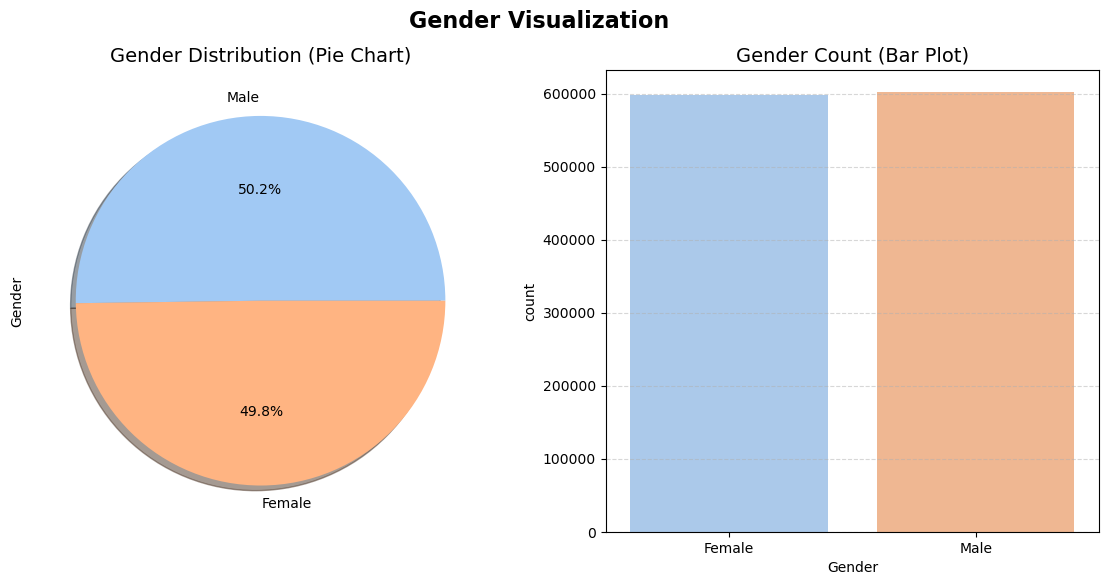

Columns in Target column are: Gender
Male      602571
Female    597429
Name: count, dtype: int64


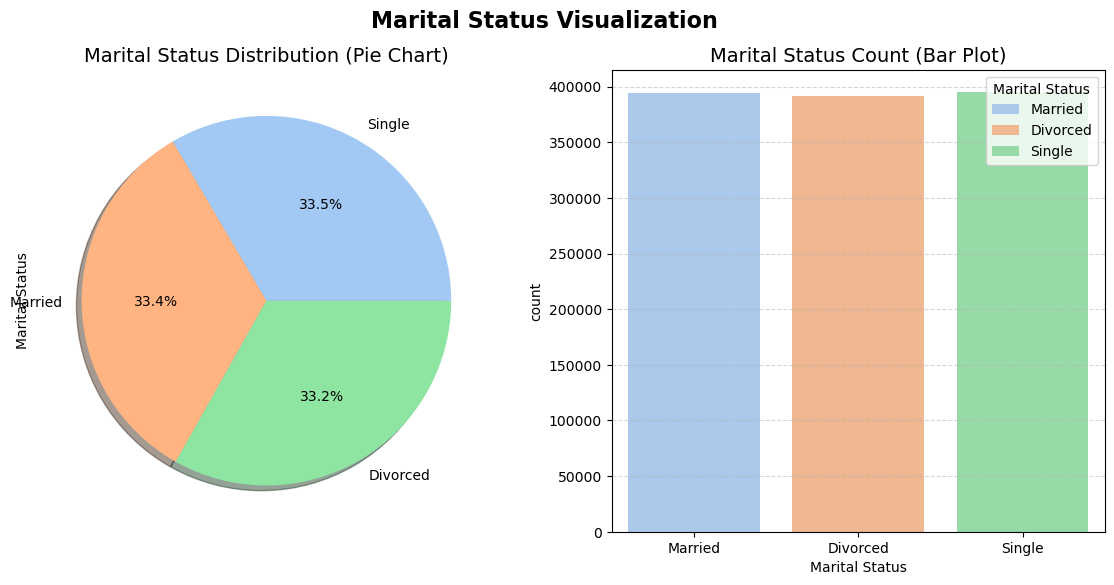

Columns in Target column are: Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64


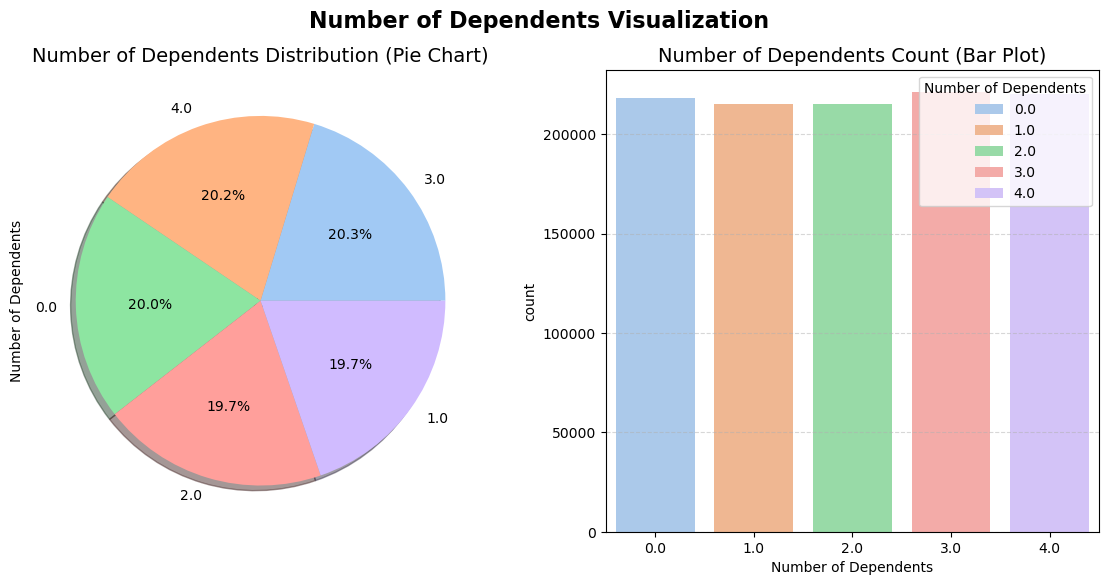

Columns in Target column are: Number of Dependents
3.0    221475
4.0    220340
0.0    218124
2.0    215313
1.0    215076
Name: count, dtype: int64


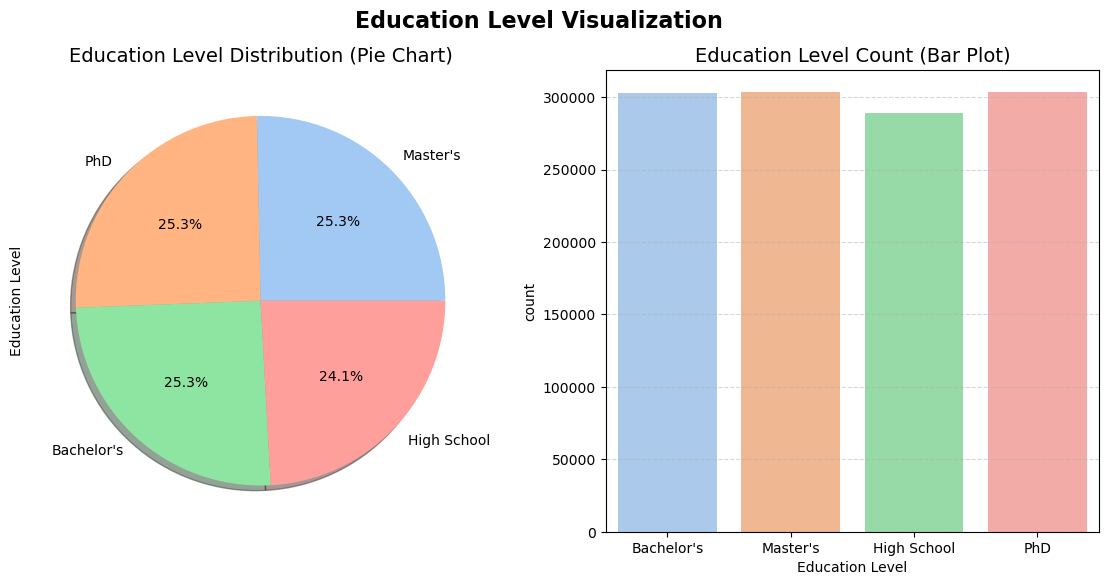

Columns in Target column are: Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


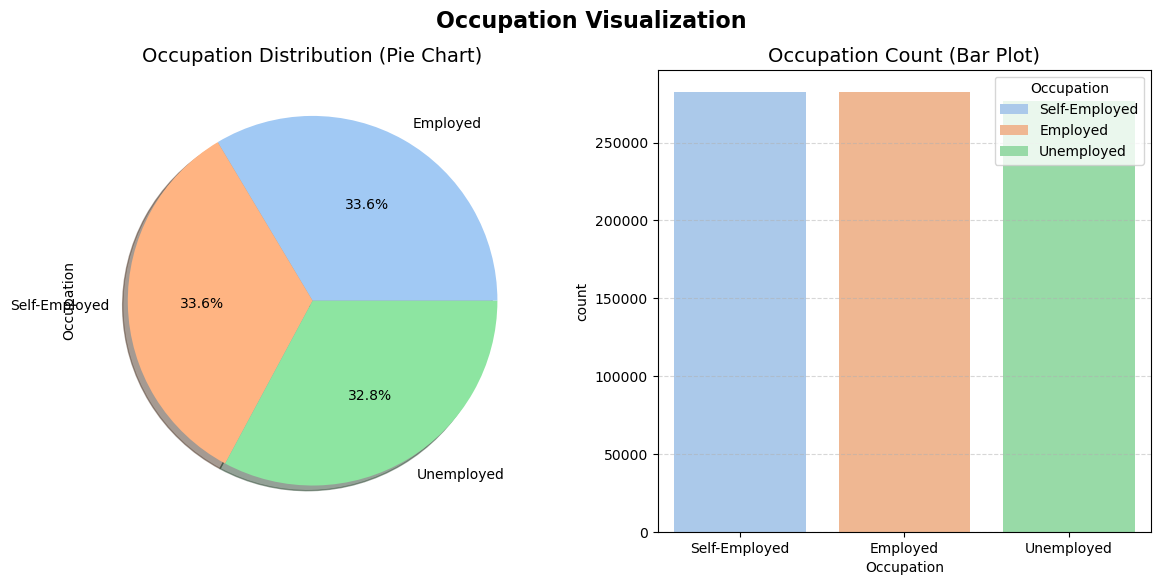

Columns in Target column are: Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


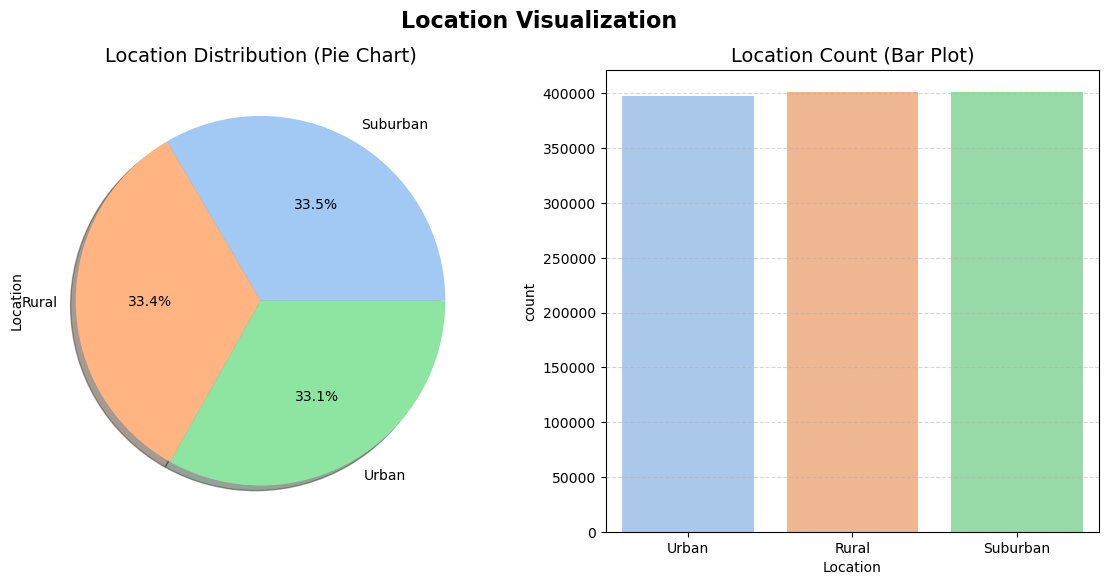

Columns in Target column are: Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64


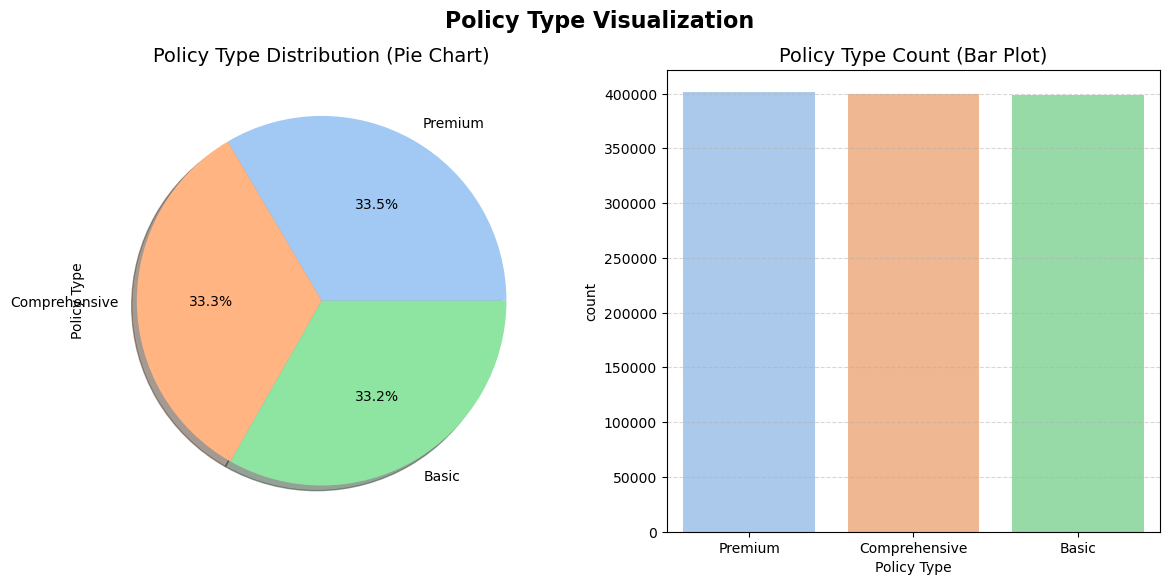

Columns in Target column are: Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64


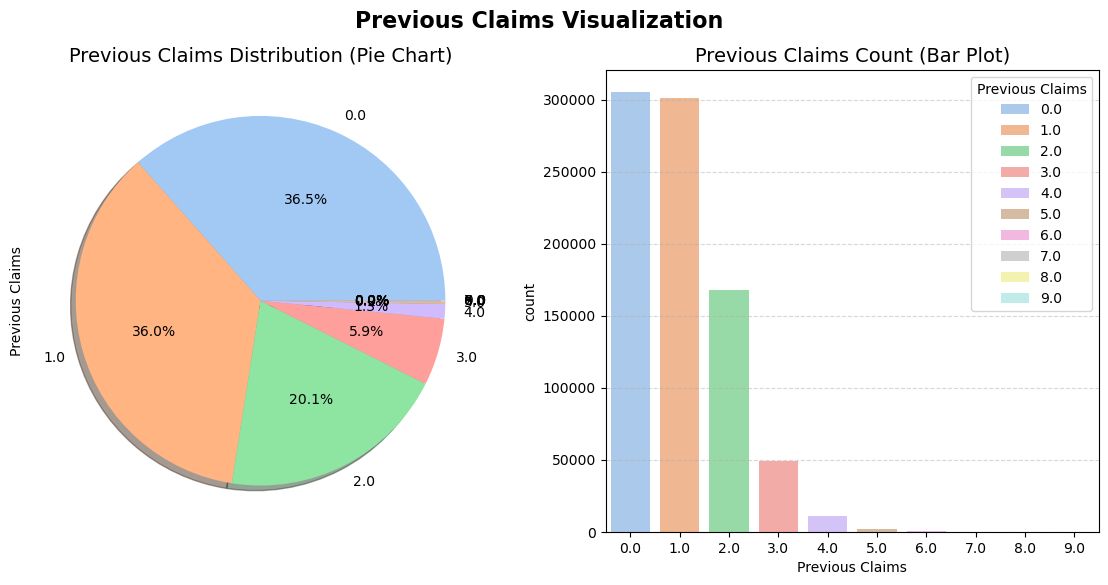

Columns in Target column are: Previous Claims
0.0    305433
1.0    300811
2.0    167661
3.0     49011
4.0     10668
5.0      2018
6.0       302
7.0        58
8.0         8
9.0         1
Name: count, dtype: int64


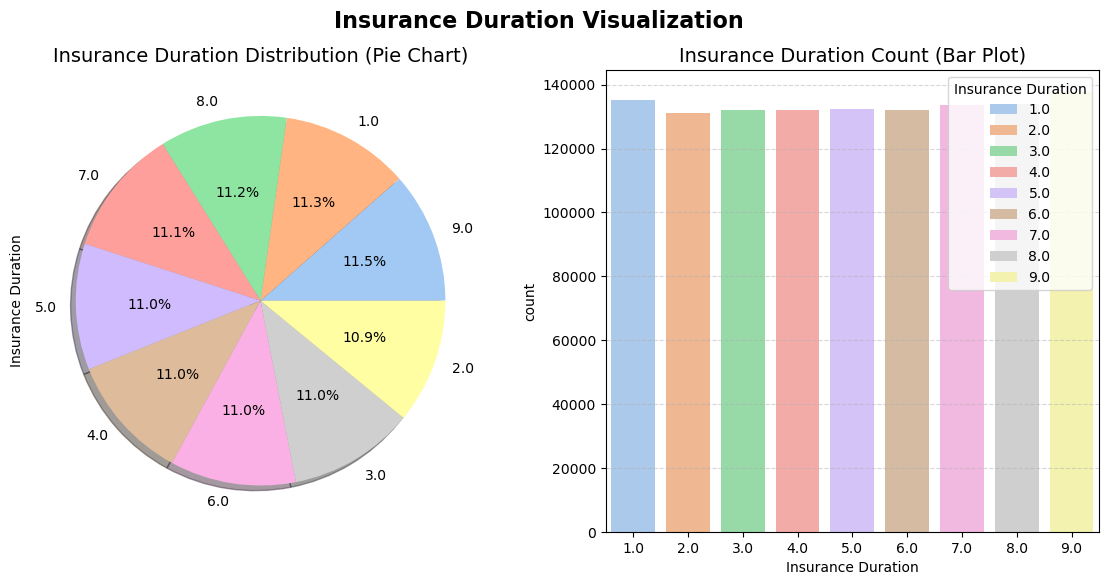

Columns in Target column are: Insurance Duration
9.0    137781
1.0    135072
8.0    133800
7.0    133592
5.0    132253
4.0    132182
6.0    132141
3.0    132018
2.0    131160
Name: count, dtype: int64


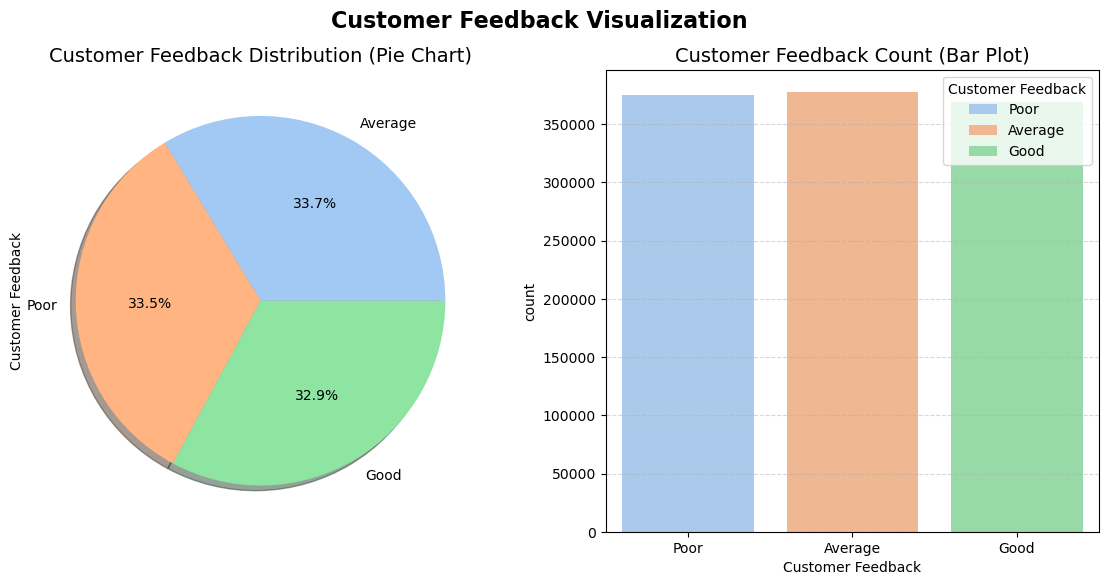

Columns in Target column are: Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64


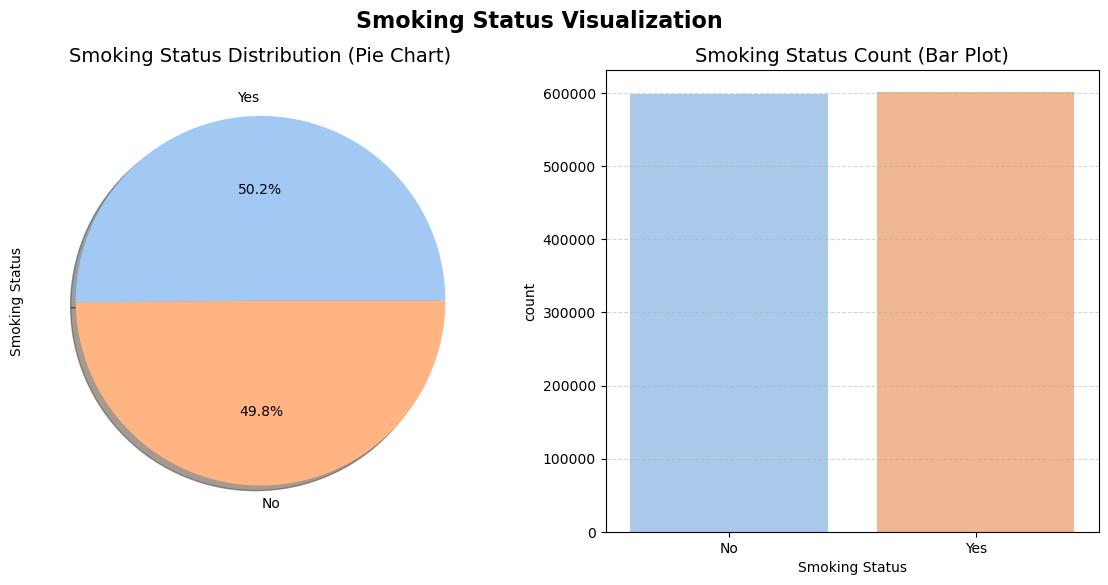

Columns in Target column are: Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64


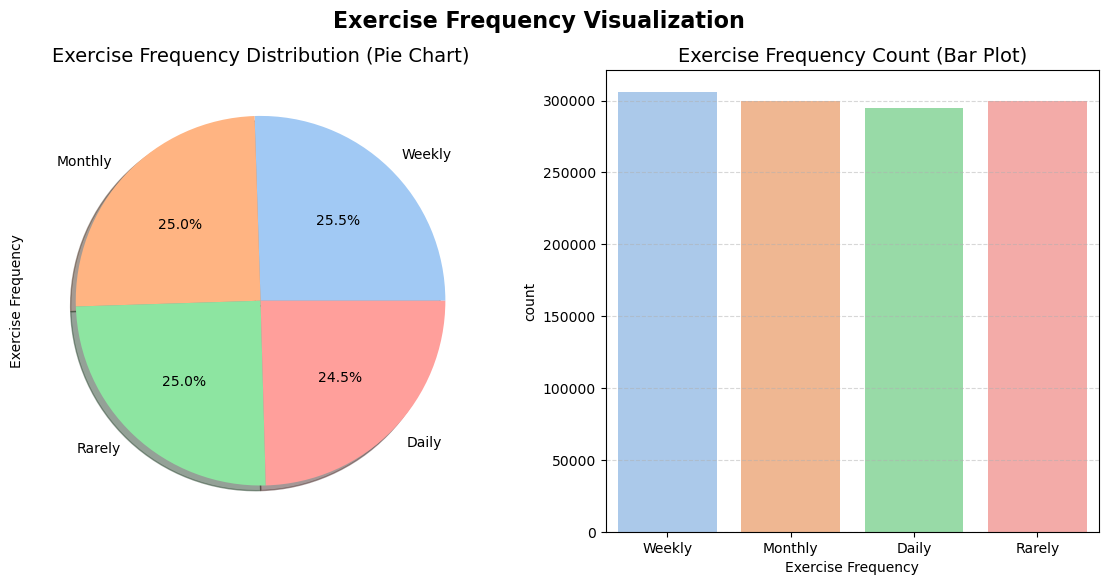

Columns in Target column are: Exercise Frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: count, dtype: int64


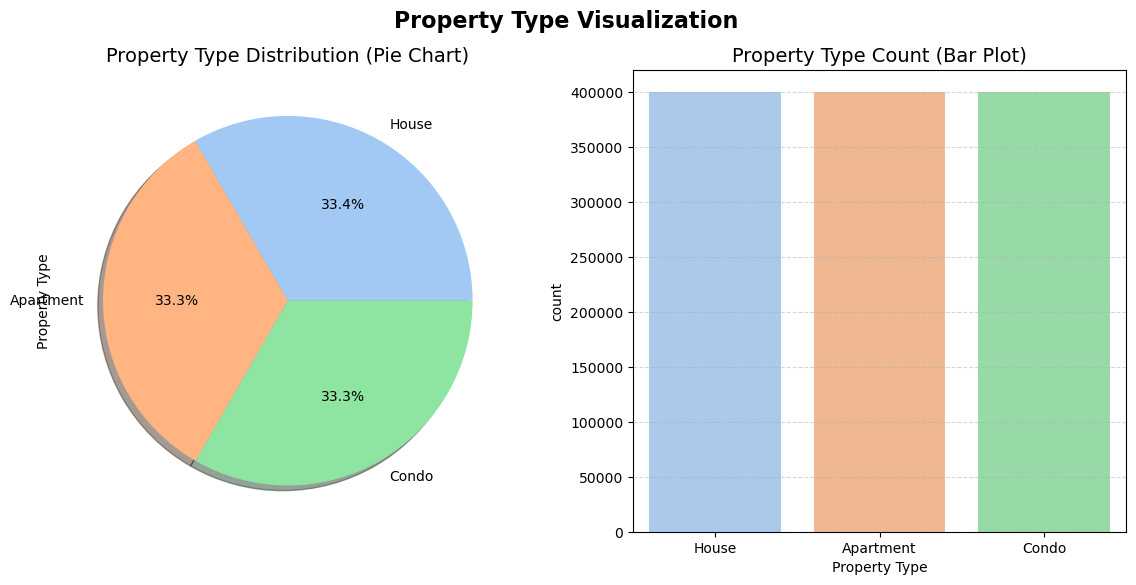

Columns in Target column are: Property Type
House        400349
Apartment    399978
Condo        399673
Name: count, dtype: int64


In [45]:
# @title category feature disturbutions
import warnings
warnings.filterwarnings("ignore")
def target_plot(column,train):
    custom_palette = sns.color_palette("pastel")
    f, ax = plt.subplots(1, 2, figsize=(14,6))
    train[column].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0], shadow=True, colors=custom_palette)
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column, data=train, ax=ax[1], palette=custom_palette,hue=column)
    ax[0].set_title(f'{column} Distribution (Pie Chart)', fontsize=14)
    ax[1].set_title(f'{column} Count (Bar Plot)', fontsize=14)
    plt.suptitle(f'{column} Visualization', fontsize=16, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
    print("Columns in Target column are:",train[column].value_counts())
for i in cat:
 target_plot(i,train)

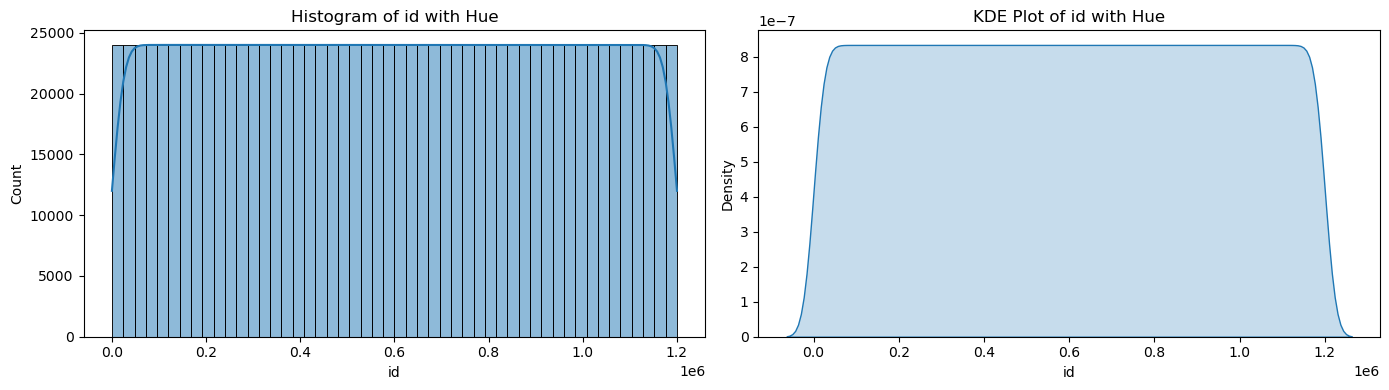

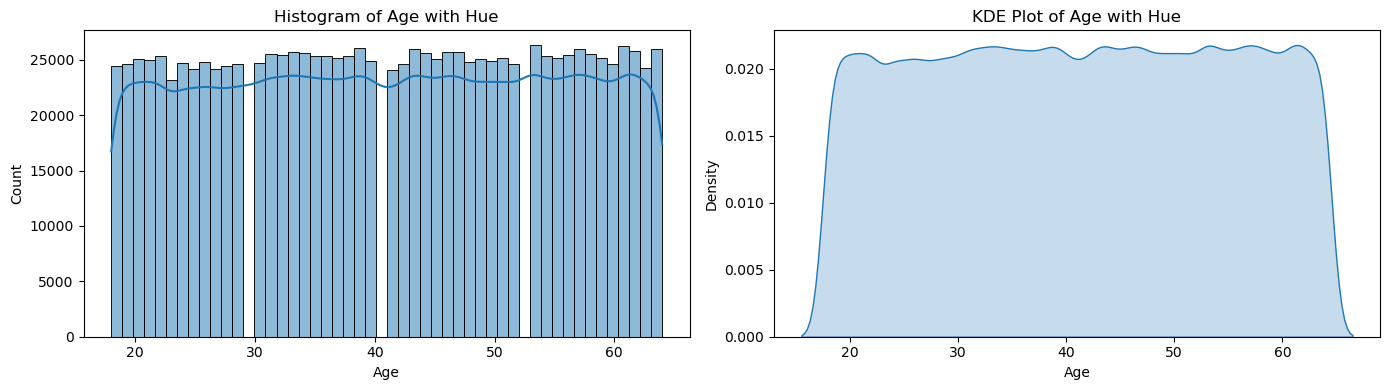

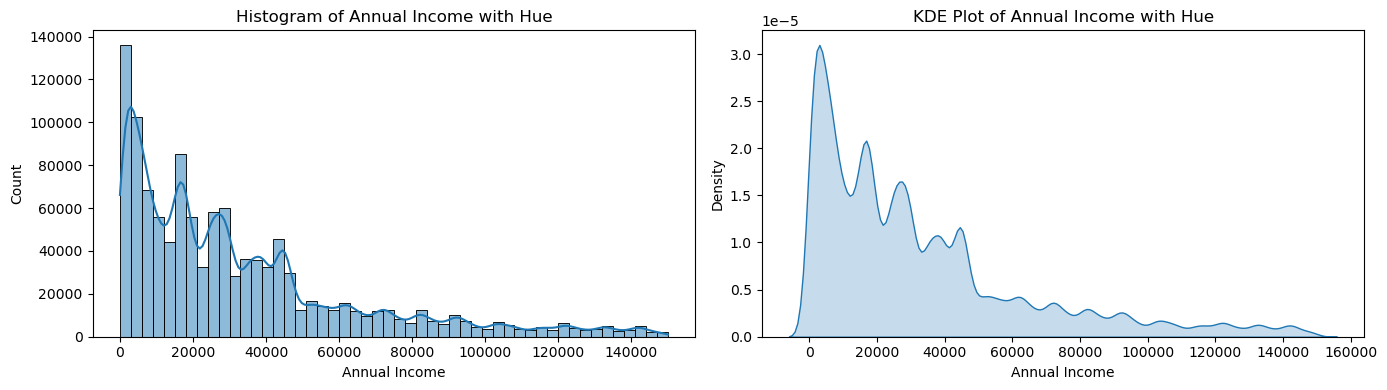

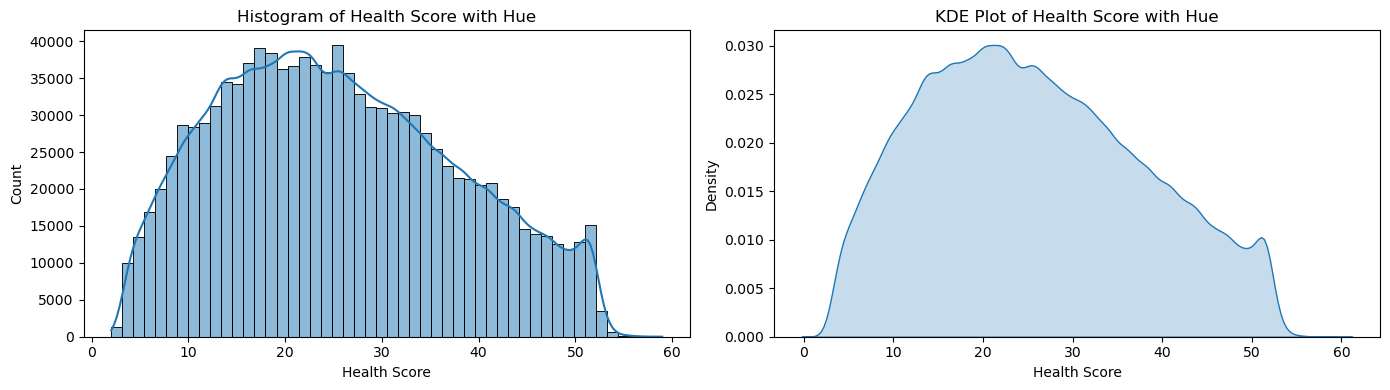

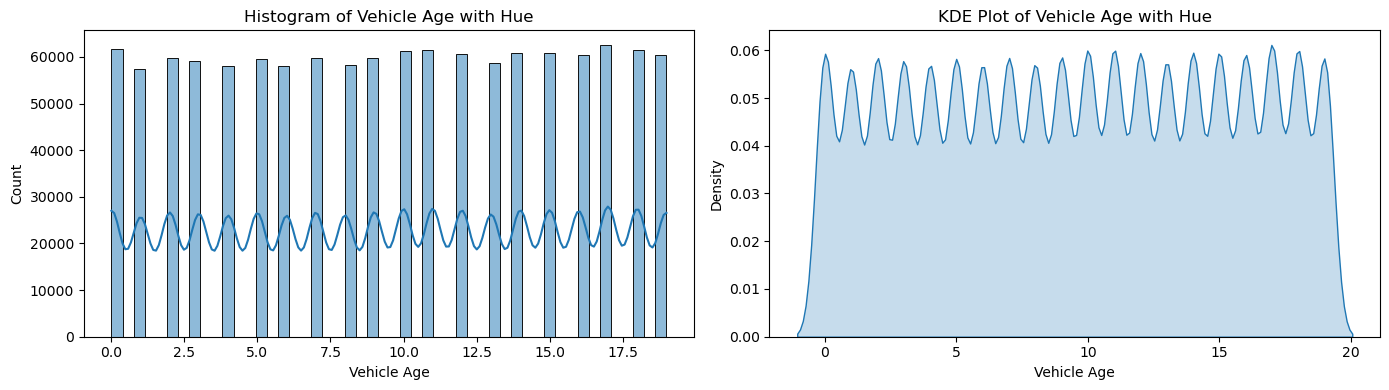

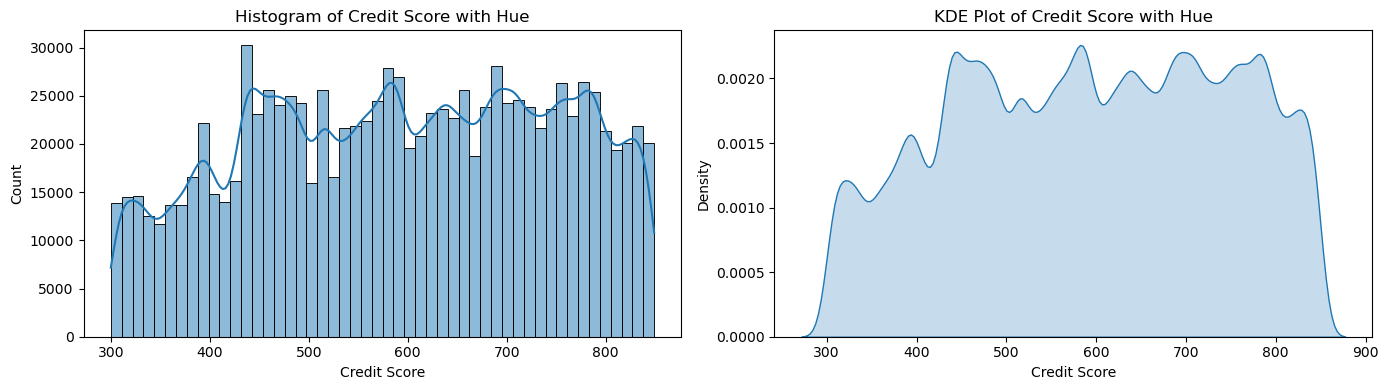

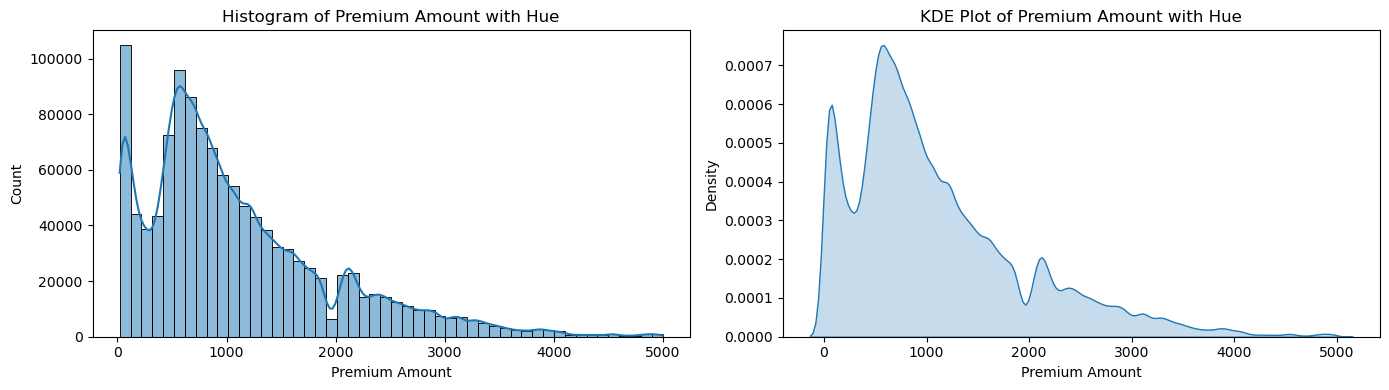

In [46]:
# @title continous feature disturbutions
def target3_plot(column,train):
      import warnings
      warnings.filterwarnings("ignore")
      hue_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
      fig, axes = plt.subplots(1, 2, figsize=(14, 4))  # Create subplots with 1 row and 2 columns

      # Plot histogram with hue
      sns.histplot(data=train, x=column, hue_order=hue_columns, bins=50, kde=True, ax=axes[0])
      axes[0].set_title(f'Histogram of {column} with Hue')
      axes[0].set_xlabel(column)
      axes[0].set_ylabel('Count')
      # axes[0].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      # Plot KDE plot with hue
      sns.kdeplot(data=train, x=column, shade=True,hue_order=hue_columns, ax=axes[1])
      axes[1].set_title(f'KDE Plot of {column} with Hue')
      axes[1].set_xlabel(column)
      axes[1].set_ylabel('Density')
      # axes[1].legend(title='Fault Types', loc='upper right',fontsize="x-large")

      plt.tight_layout()  # Adjust spacing between subplots
      plt.show()

for i in cont:
   target3_plot(i,train)


In [49]:
from sklearn import preprocessing

def encoder(data):
  for col in data.columns:
      if data.dtypes[col] == "object":
          le = preprocessing.LabelEncoder()
          le.fit(data[col])
          data[col] = le.transform(data[col])
  return data
x=encoder(x)


In [50]:
x

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,19.0,0,10049.0,1,1.0,0,1,22.598761,2,2,2.0,17.0,372.0,5.0,145522,2,0,3,2
1,39.0,0,31678.0,0,3.0,2,3,15.569731,0,1,1.0,12.0,694.0,2.0,127832,0,1,1,2
2,23.0,1,25602.0,0,3.0,1,1,47.177549,1,2,1.0,14.0,NaN,3.0,137880,1,1,3,2
3,21.0,1,141855.0,1,2.0,0,3,10.938144,0,0,1.0,0.0,367.0,1.0,161517,2,1,0,0
4,21.0,1,39651.0,2,1.0,0,1,20.376094,0,2,0.0,8.0,598.0,4.0,76621,2,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.0,1,0.0,2,2,13.772907,2,2,NaN,5.0,372.0,3.0,124181,2,0,0,0
1199996,54.0,1,35786.0,0,NaN,2,1,11.483482,0,1,NaN,10.0,597.0,4.0,102449,2,0,3,0
1199997,19.0,1,51884.0,0,0.0,2,3,14.724469,1,0,0.0,19.0,NaN,6.0,59151,1,0,1,1
1199998,55.0,1,NaN,2,1.0,3,3,18.547381,1,2,1.0,7.0,407.0,4.0,69979,2,0,0,0


In [56]:
from sklearn.model_selection import train_test_split

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,shuffle=True )

# @title gaussian
from sklearn.ensemble import HistGradientBoostingRegressor
model=HistGradientBoostingRegressor()

model.fit(xtr,ytr)
model.score(xte,yte)

0.06778335197200502

In [58]:

l=model.predict(encoder(test.drop('id',axis=1)))
df=pd.DataFrame()
df['Premium Amount']=l
df['id']=test['id']
df.to_csv("sample_submission.csv", index=False)


In [ ]:
from xgboost import XGBClassifier
